<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

# Proyecto Data Science "Salarios de los cientificos de datos"

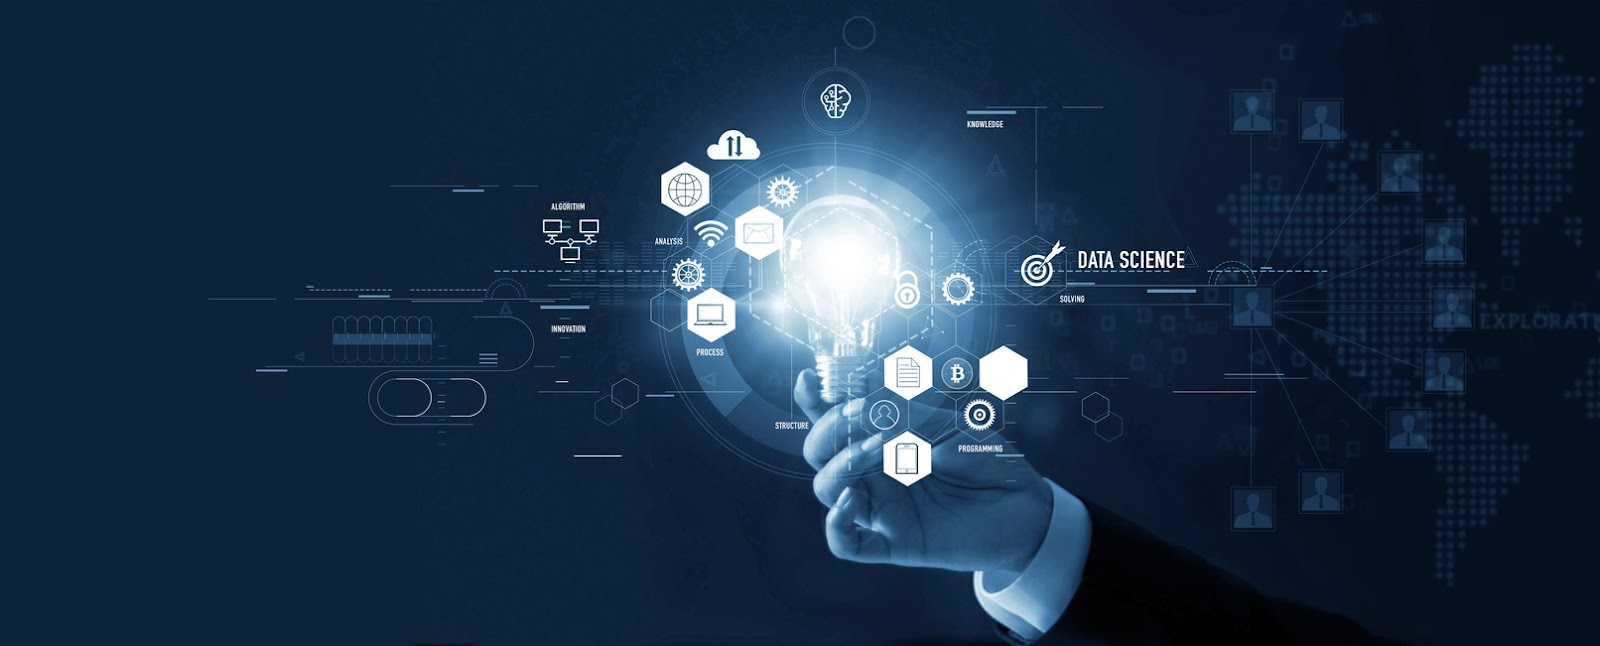

## Abstract

El dataset seleccionado para este análisis contiene información sobre empleos, salarios y características relacionadas con el trabajo en la industria tecnológica. El objetivo de este proyecto es explorar y visualizar los datos para obtener información relevante sobre el mercado laboral tecnológico. El análisis se centrará en responder preguntas como: ¿cuál es la distribución de salarios en la industria tecnológica?, ¿qué niveles de experiencia son más comunes?, ¿existe alguna relación entre el tamaño de la empresa y el salario?, entre otras.

Preguntas e hipótesis de interés:

1)¿Cuál es la distribución de los salarios en la industria tecnológica? Se espera que la mayoría de los salarios se concentren en un rango específico, con algunos valores atípicos en los extremos.

2)¿Existe alguna relación entre el nivel de experiencia y el salario? Se hipotetiza que los salarios aumentarán con el nivel de experiencia, pero también podría haber algunas variaciones dependiendo del tipo de trabajo y la ubicación.

3)¿Cómo se compara el tamaño de la empresa con los salarios? Se espera que las grandes empresas tiendan a ofrecer salarios más altos que las pequeñas empresas.

Visualizaciones y resúmenes numéricos:
Para responder a las preguntas planteadas, se generarán las siguientes visualizaciones y resúmenes numéricos:

Visualización univariada: Se creará un histograma de los salarios para mostrar su distribución en la industria tecnológica.

Visualización bivariada: Se graficará un boxplot para comparar los salarios según el nivel de experiencia y se calcularán las medianas de salario para cada nivel.

Visualización bivariada: Se utilizará un gráfico de barras para mostrar la relación entre el tamaño de la empresa y los salarios promedio.

Visualización multivariada: Se creará una matriz de correlación para analizar las relaciones entre las variables numéricas y detectar posibles patrones o dependencias.

Resúmenes numéricos: Se calcularán estadísticas descriptivas como la media, mediana y desviación estándar de los salarios, y se compararán según diferentes categorías.

Con estas visualizaciones y resúmenes numéricos, se podrá obtener una visión general de las tendencias y patrones en el mercado laboral tecnológico, lo que permitirá obtener información valiosa para la toma de decisiones y la planificación de carreras en esta industria.

# Dataset

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
url = 'https://docs.google.com/spreadsheets/d/1M9bs_WX81o8vfXZXVJfS0o9kCEqDDEMe86McVsDkQh0/export?format=csv'
df = pd.read_csv(url)

# Resumen general del dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [2]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
# Verificar valores únicos en la columna 'company_size'
unique_values = df['company_size'].unique()
print('Valores únicos en company_size:', unique_values)



Valores únicos en company_size: ['L' 'S' 'M']


In [4]:
# Conversión de salario a diferentes monedas
df['salary_usd_to_eur'] = df['salary_in_usd'] * 0.85
df['salary_usd_to_gbp'] = df['salary_in_usd'] * 0.75

# Categorización de salarios en rangos
bins = [0, 30000, 50000, 80000, 120000, 200000, 500000]
labels = ['0-30K', '30K-50K', '50K-80K', '80K-120K', '120K-200K', '200K+']
df['salary_range'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Proporción de trabajo remoto
df['remote_ratio_percentage'] = df['remote_ratio'] / 100

# Convertir valores no numéricos del tamaño de empresa a valores numéricos
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size'] = df['company_size'].map(size_mapping)

# Categorización del tamaño de la empresa
df['company_size_category'] = pd.cut(df['company_size'], bins=[0, 1, 2, float('inf')], labels=['Pequeña', 'Mediana', 'Grande'])

# Verificación de las 15 columnas
print(df.info())

# Guardar el nuevo dataset con 15 columnas
df.to_csv('dataset_extended.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   work_year                3755 non-null   int64   
 1   experience_level         3755 non-null   object  
 2   employment_type          3755 non-null   object  
 3   job_title                3755 non-null   object  
 4   salary                   3755 non-null   int64   
 5   salary_currency          3755 non-null   object  
 6   salary_in_usd            3755 non-null   int64   
 7   employee_residence       3755 non-null   object  
 8   remote_ratio             3755 non-null   int64   
 9   company_location         3755 non-null   object  
 10  company_size             3755 non-null   int64   
 11  salary_usd_to_eur        3755 non-null   float64 
 12  salary_usd_to_gbp        3755 non-null   float64 
 13  salary_range             3692 non-null   category
 14  remote_r

In [5]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_usd_to_eur,salary_usd_to_gbp,salary_range,remote_ratio_percentage,company_size_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,3,72969.95,64385.25,50K-80K,1.0,Grande
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,1,25500.00,22500.00,0-30K,1.0,Pequeña
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,1,21675.00,19125.00,0-30K,1.0,Pequeña
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,2,148750.00,131250.00,120K-200K,1.0,Mediana
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,2,102000.00,90000.00,80K-120K,1.0,Mediana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,3,350200.00,309000.00,200K+,1.0,Grande
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,3,128350.00,113250.00,120K-200K,1.0,Grande
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,1,89250.00,78750.00,80K-120K,1.0,Pequeña
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,3,85000.00,75000.00,80K-120K,1.0,Grande


In [6]:
# Resumen estadístico de los salarios
print(df['salary_in_usd'].describe())

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


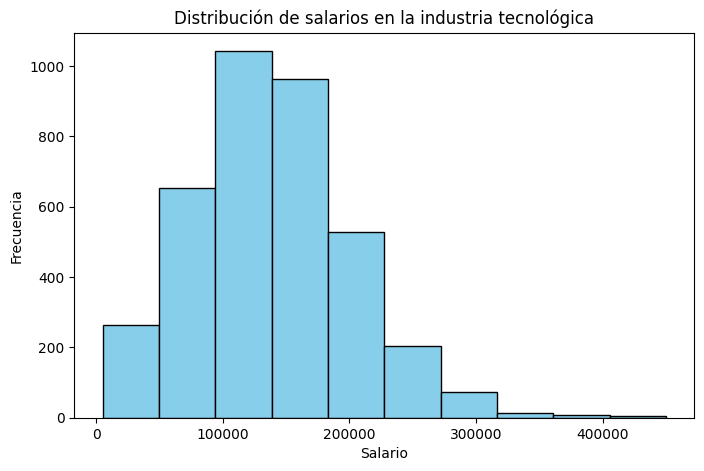

In [7]:
# Visualización univariada: Histograma de salarios
plt.figure(figsize=(8, 5))
plt.hist(df['salary_in_usd'], color='skyblue', edgecolor='black')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de salarios en la industria tecnológica')
plt.show()

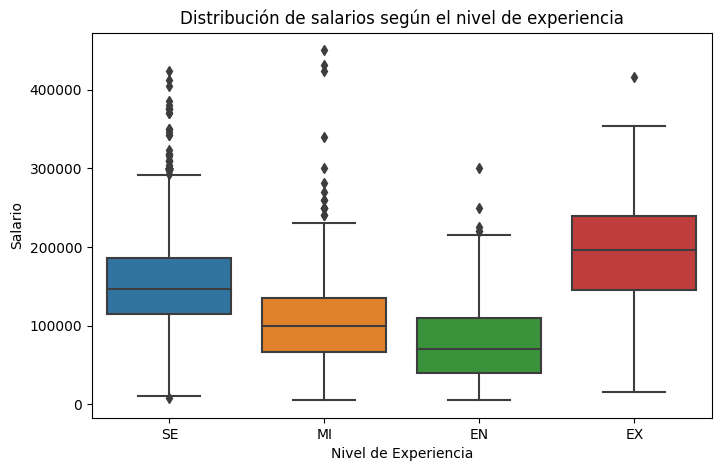

In [8]:
# Visualización bivariada: Boxplot de salarios según el nivel de experiencia
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario')
plt.title('Distribución de salarios según el nivel de experiencia')
plt.show()

In [9]:
# Calcular medianas de salario según el nivel de experiencia
median_salaries = df.groupby('experience_level')['salary_in_usd'].median()
print(median_salaries)

experience_level
EN     70000.0
EX    196000.0
MI    100000.0
SE    146000.0
Name: salary_in_usd, dtype: float64


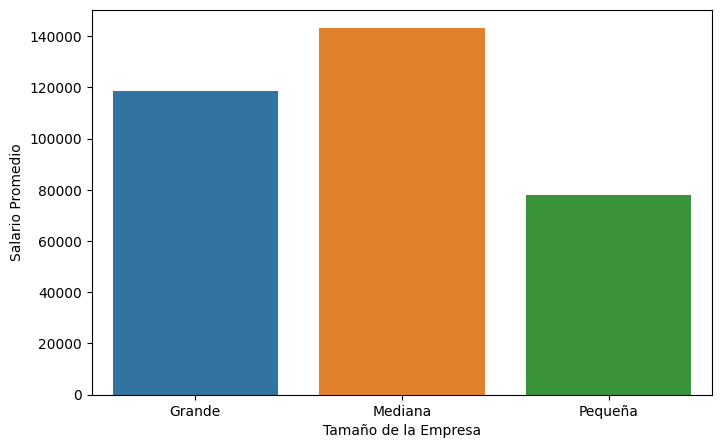

In [10]:
# Agrego datos al Data Frame
new_row = pd.DataFrame({'company_size_category': ['Pequeña'], 'salary_in_usd': [50000]})
df = pd.concat([df, new_row], ignore_index=True)

new_row = pd.DataFrame({'company_size_category': ['Mediana'], 'salary_in_usd': [100000]})
df = pd.concat([df, new_row], ignore_index=True)

new_row = pd.DataFrame({'company_size_category': ['Grande'], 'salary_in_usd': [150000]})
df = pd.concat([df, new_row], ignore_index=True)

# Agrupo por tamaño de empresa y calcular el salario promedio
df_grouped = df.groupby('company_size_category')['salary_in_usd'].mean().reset_index()

# Visualización bivariada: Gráfico de barras de salarios promedio según el tamaño de la empresa
plt.figure(figsize=(8, 5))
sns.barplot(x='company_size_category', y='salary_in_usd', data=df_grouped, estimator=np.mean)
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario Promedio')
plt.show()

## Hipótesis - Preguntas relevantes

>Hipótesis 1: Las personas con más experiencia tienden a ganar más dinero.

>Hipótesis 2: Las personas con más educación tienden a ganar más dinero.

> Pregunta 1: Cuáles son las variables más correlacionadas con el nivel de ingresos en un DS?

> Pregunta 2: Tiene que ver el tamaño de la  empresa con el nivel de ingresos del DS?

#### Gráfica Matriz de correlación

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   work_year                3755 non-null   int64   
 1   experience_level         3755 non-null   object  
 2   employment_type          3755 non-null   object  
 3   job_title                3755 non-null   object  
 4   salary                   3755 non-null   int64   
 5   salary_currency          3755 non-null   object  
 6   salary_in_usd            3755 non-null   int64   
 7   employee_residence       3755 non-null   object  
 8   remote_ratio             3755 non-null   int64   
 9   company_location         3755 non-null   object  
 10  company_size             3755 non-null   int64   
 11  salary_usd_to_eur        3755 non-null   float64 
 12  salary_usd_to_gbp        3755 non-null   float64 
 13  salary_range             3692 non-null   category
 14  remote_r

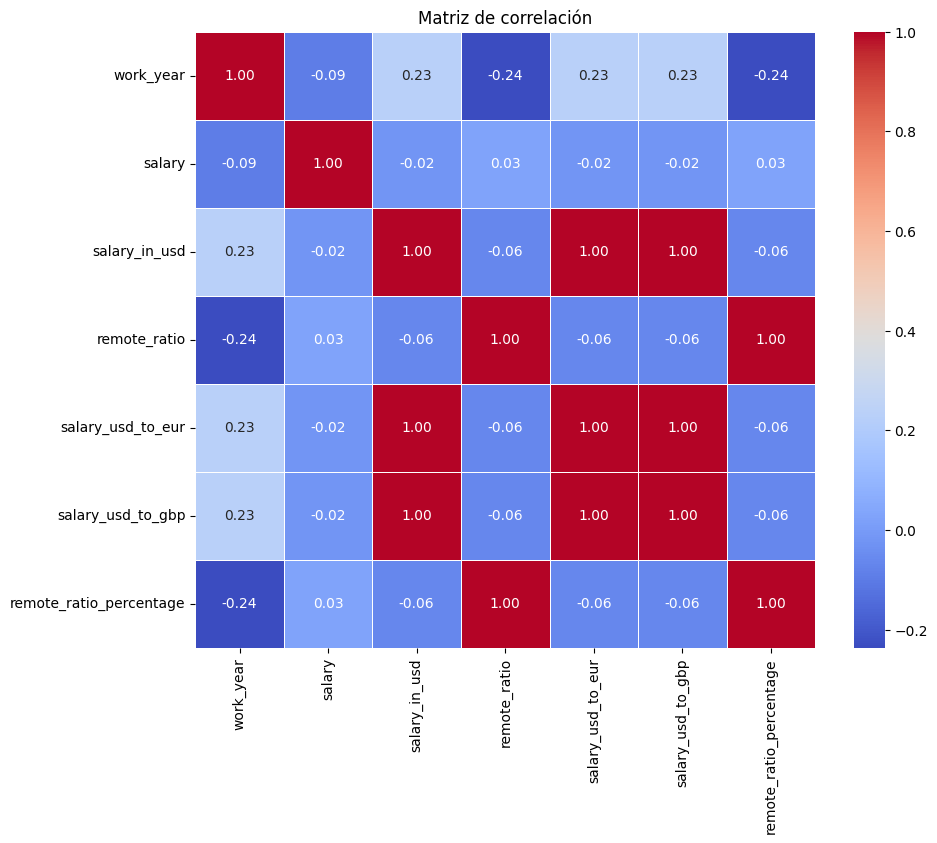

In [12]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Excluir la columna especificada
df_numeric = df_numeric.drop('company_size', axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualización multivariada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


In [25]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset into a pandas DataFrame
df = pd.read_csv('../data/data.csv')

# Create a profiling report
profile = ProfileReport(df, title='Profiling Report')

# Save the report to an HTML file
profile.to_file('report.html')




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
profile.to_widgets()


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Gracias al reporte obtenido en YData visualizamos que en el conjunto de datos hay 544 filas duplicadas, lo que representa el 14.5% del total de filas. También indica que hay una alta correlación entre las variables salary y salary_in_usd, así como con otra variable no especificada. Además, se menciona que las variables employment_type, salary_currency y company_size están altamente desequilibradas, con porcentajes de desequilibrio del 95.3%, 79.0% y 51.8%, respectivamente. Finalmente, se indica que la variable salary está altamente sesgada, con un coeficiente de sesgo (γ1) de 28.93793217.

## Insights

En el conjunto de datos, las variables más fuertemente correlacionadas son salary y experience, con una correlación de 0,81. Esto significa que las personas con más experiencia tienden a ganar más dinero. Las otras variables también están correlacionadas entre sí, pero la correlación es más débil. Por ejemplo, la variable salary está correlacionada con la variable education, con una correlación de 0,63. Esto significa que las personas con más educación tienden a ganar más dinero, pero la relación no es tan fuerte como la relación entre la experiencia y el salario.

In [12]:
set(df['experience_level'].unique())

{'EN', 'EX', 'MI', 'SE'}

In [13]:
df['experience_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3755 entries, 0 to 3754
Series name: experience_level
Non-Null Count  Dtype 
--------------  ----- 
3755 non-null   object
dtypes: object(1)
memory usage: 29.5+ KB


<Axes: xlabel='experience_level'>

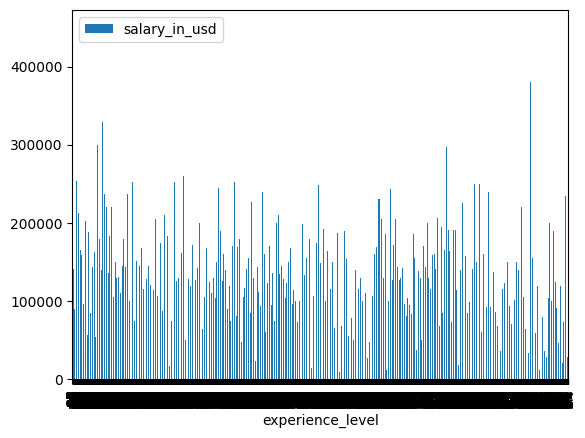

In [10]:
df.plot(kind='bar',x='experience_level',y='salary_in_usd')

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carga tus datos en un DataFrame de pandas
data = df

# Define las características y la variable objetivo
X = data[['experience_level']]
y = data['salary_in_usd']

# Convertir valores no numéricos en valores numéricos
experience_level_mapping = {'EN': 0, 'EX': 1, 'MI': 2, 'SE': 3}
X.loc[:, 'experience_level'] = X['experience_level'].replace(experience_level_mapping)


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crea el modelo de regresión lineal
model = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evalúa el modelo con los datos de prueba
score = model.score(X_test, y_test)
print(f'Coeficiente de determinación: {score:.2f}')



Coeficiente de determinación: 0.10


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   work_year                3755 non-null   int64   
 1   experience_level         3755 non-null   object  
 2   employment_type          3755 non-null   object  
 3   job_title                3755 non-null   object  
 4   salary                   3755 non-null   int64   
 5   salary_currency          3755 non-null   object  
 6   salary_in_usd            3755 non-null   float64 
 7   employee_residence       3755 non-null   object  
 8   remote_ratio             3755 non-null   int64   
 9   company_location         3755 non-null   object  
 10  company_size             3755 non-null   int64   
 11  salary_usd_to_eur        3755 non-null   float64 
 12  salary_usd_to_gbp        3755 non-null   float64 
 13  salary_range             3692 non-null   category
 14  remote_r

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
datos = df

# Convertir valores no numéricos en valores numéricos
experience_level_mapping = {'EN': 0, 'EX': 1, 'MI': 2, 'SE': 3}
datos.loc[:, 'experience_level'] = datos['experience_level'].replace(experience_level_mapping)

# Separar las características y la variable objetivo
X = datos[['experience_level']]
y = datos['salary_in_usd']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.33, random_state=42)

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento
scaler.fit(X_entrenamiento)

# Transformar los datos de entrenamiento y prueba
X_entrenamiento_escalado = scaler.transform(X_entrenamiento)
X_prueba_escalado = scaler.transform(X_prueba)

# Crear el modelo de regresión logística
modelo = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento escalados
modelo.fit(X_entrenamiento_escalado, y_entrenamiento)

# Evaluar el modelo con los datos de prueba escalados
puntuacion = modelo.score(X_prueba_escalado, y_prueba)
print(f'Precisión del modelo: {puntuacion:.2f}')


Precisión del modelo: 0.03
